In [1]:
#Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import r2_score
import sklearn.model_selection as ms
%matplotlib inline
from sklearn.metrics import mean_absolute_error
from tpot import TPOTClassifier
from tpot import TPOTRegressor
import timeit
from xgboost.sklearn import XGBRegressor
import xgboost as xg 
from xgboost import plot_importance
from sklearn import ensemble
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xg 

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Start Label Encoding

In [3]:
#make new variable to not mess up train df
train_c = train

#ordinal data encoding

MSZoning = {"A":0, "C (all)":0, "FV":0, "I":0, "RH":4, "RL":1, "RP":2, "RM":3}
train_c["MSZoning"] = train_c["MSZoning"].replace(MSZoning)

LotShape = {"Reg":2, "IR1":1, "IR2":1, "IR3":0}
train_c["LotShape"] = train_c["LotShape"].replace(LotShape)

LandContour = {"Lvl":2, "Bnk":1, "HLS":1, "Low":0}
train_c["LandContour"] = train_c["LandContour"].replace(LandContour)

LotConfig = {"Inside":0, "Corner":1, "CulDSac":0, "FR2":2, "FR3":2}
train_c["LotConfig"] = train_c["LotConfig"].replace(LotConfig)

LandSlope = {"Gtl":2, "Mod":1, "Sev":0}
train_c["LandSlope"] = train_c["LandSlope"].replace(LandSlope)

BldgType = {"1Fam":2, "2fmCon":0, "Duplex":0, "TwnhsE":1, "Twnhs":0}
train_c["BldgType"] = train_c["BldgType"].replace(BldgType)

HouseStyle = {"1Story":0, "1.5Fin":2, "1.5Unf":1, "2Story":5, "2.5Fin":4, "2.5Unf":3, "SFoyer":3, "SLvl":3}
train_c["HouseStyle"] = train_c["HouseStyle"].replace(HouseStyle)

RoofStyle = {"Flat":0, "Gable":2, "Gambrel":2, "Hip":2, "Mansard":2, "Shed":1}
train_c["RoofStyle"] = train_c["RoofStyle"].replace(RoofStyle)

RoofMatl = {"ClyTile":4, "CompShg":1, "Membran":0, "Metal":3, "Roll":0, "Tar&Grv":0, "WdShake":2, "WdShngl":2}
train_c["RoofMatl"] = train_c["RoofMatl"].replace(RoofMatl)

Exterior1st = {"AsbShng":0, "AsphShn":0, "BrkComm":2, "BrkFace":1, "CBlock":1, "CemntBd":1, "HdBoard":2, "ImStucc":1, "MetalSd":3, "Other":0, "Plywood":0, "PreCast":1, "Stone":2, "Stucco":2, "VinylSd":3, "Wd Sdng":3, "WdShing":3}
train_c["Exterior1st"] = train_c["Exterior1st"].replace(Exterior1st)

Exterior2nd = {"AsbShng":0, "AsphShn":0, "Brk Cmn":2, "BrkFace":1, "CBlock":1, "CmentBd":1, "HdBoard":2, "ImStucc":1, "MetalSd":3, "Other":0, "Plywood":0, "Stone":2, "Stucco":2, "VinylSd":3, "Wd Shng":3, "Wd Sdng":3}
train_c["Exterior2nd"] = train_c["Exterior2nd"].replace(Exterior2nd)

MasVnrType = {"BrkCmn":2, "BrkFace":2, "CBlock":1, "None":0, "Stone":1}
train_c["MasVnrType"] = train_c["MasVnrType"].replace(MasVnrType)

ExterQual = {"Ex":4, "Gd":3, "TA":2, "Fa":1, "Po":0}
train_c["ExterQual"] = train_c["ExterQual"].replace(ExterQual)

ExterCond = {"Ex":4, "Gd":3, "TA":2, "Fa":1, "Po":0}
train_c["ExterCond"] = train_c["ExterCond"].replace(ExterCond)

Foundation = {"BrkTil":0, "CBlock":1, "PConc":2, "Slab":1, "Stone":0, "Wood":0}
train_c["Foundation"] = train_c["Foundation"].replace(Foundation)

BsmtQual = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}
train_c["BsmtQual"] = train_c["BsmtQual"].replace(BsmtQual)

BsmtCond = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}
train_c["BsmtCond"] = train_c["BsmtCond"].replace(BsmtCond)

BsmtExposure = {"Gd":4, "Av":3, "Mn":2, "No":1, "NA":0}
train_c["BsmtExposure"] = train_c["BsmtExposure"].replace(BsmtExposure)

BsmtFinType1 = {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "NA":0}
train_c["BsmtFinType1"] = train_c["BsmtFinType1"].replace(BsmtFinType1)

BsmtFinType2 = {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "NA":0}
train_c["BsmtFinType2"] = train_c["BsmtFinType2"].replace(BsmtFinType2)

Heating = {"Floor":6, "GasA":5, "GasW":4, "Grav":3, "OthW":2, "Wall":1, "NA":0}
train_c["Heating"] = train_c["Heating"].replace(Heating)

HeatingQC = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}
train_c["HeatingQC"] = train_c["HeatingQC"].replace(HeatingQC)

Electrical = {"SBrkr":3, "FuseA":2, "FuseF":2, "FuseP":2, "Mix":1, "NA":0}
train_c["Electrical"] = train_c["Electrical"].replace(Electrical)

KitchenQual = {"Ex":4, "Gd":3, "TA":2, "Fa":1, "Po":0}
train_c["KitchenQual"] = train_c["KitchenQual"].replace(KitchenQual)

Functional = {"Typ":4, "Min1":3, "Min2":3, "Mod":2, "Maj1":1, "Maj2":1, "Sev":0, "Sal":0, "NA":0}
train_c["Functional"] = train_c["Functional"].replace(Functional)

FireplaceQu = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}
train_c["FireplaceQu"] = train_c["FireplaceQu"].replace(FireplaceQu)

GarageFinish = {"Fin":2, "RFn":1, "Unf":1, "NA":0}
train_c["GarageFinish"] = train_c["GarageFinish"].replace(GarageFinish)

GarageQual = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}
train_c["GarageQual"] = train_c["GarageQual"].replace(GarageQual)

GarageCond = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}
train_c["GarageCond"] = train_c["GarageCond"].replace(GarageCond)

PoolQC = {"Ex":4, "Gd":3, "TA":2, "Fa":1, "NA":0}
train_c["PoolQC"] = train_c["PoolQC"].replace(PoolQC)

Fence = {"GdPrv":2, "MnPrv":1, "GdWo":2, "MnWw":1, "NA":0}
train_c["Fence"] = train_c["Fence"].replace(Fence)

MiscFeature = {"Elev":3, "Gar2":2, "Othr":1, "Shed":1, "TenC":2, "NA":0}
train_c["MiscFeature"] = train_c["MiscFeature"].replace(MiscFeature)

Street = {"Grvl":0, "Pave":1}
train_c["Street"] = train_c["Street"].replace(Street)

Alley = {"Grvl":0, "Pave":1}
train_c["Alley"] = train_c["Alley"].replace(Alley)

CentralAir = {"N":0, "Y":1}
train_c["CentralAir"] = train_c["CentralAir"].replace(CentralAir)

GarageType = {"2Types":1, "Attchd":1, "Basment":1, "BuiltIn":1, "CarPort":1, "Detchd":1, "NA":0}
train_c["GarageType"] = train_c["GarageType"].replace(GarageType)

PavedDrive = {"Y":2, "P":1, "N":0}
train_c["PavedDrive"] = train_c["PavedDrive"].replace(PavedDrive)

In [4]:
#nominal any order ?
lablcodr = LabelEncoder()

train_c["Utilities"] = lablcodr.fit_transform(train_c['Utilities'])
train_c["Neighborhood"] = lablcodr.fit_transform(train_c['Neighborhood'])
train_c["Condition1"] = lablcodr.fit_transform(train_c['Condition1'])
train_c["Condition2"] = lablcodr.fit_transform(train_c['Condition2'])
train_c['SaleType'] = lablcodr.fit_transform(train_c['SaleType'])
train_c["SaleCondition"] = lablcodr.fit_transform(train_c['SaleCondition'])

#remove "duplicated" variables
train_c.drop(['Condition2'], axis = 1, inplace = True)
train_c.drop(['Id'], axis = 1, inplace = True)


# Missing Value Replacement

In [5]:
#Lets get rid of the features with more than 80% of the data missing
#We want to do this because if we are imputing over 80% of the data with the same value, the feature will have low variance
#and will no longer be informative to the model

missing = train_c.isnull().sum().to_frame()
missing = missing[0].sort_values(ascending=False).head(10).to_frame()
missing[0] = missing[0].apply(lambda x : x/1460)
missing

,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
LotFrontage,0.177397
GarageType,0.055479
GarageYrBlt,0.055479
GarageQual,0.055479
GarageCond,0.055479


In [6]:
#We will want to get rid of the Pool, Misc Feature, Alley, and Fence feature since over 80% of the data is missing
train_c = train_c.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

In [7]:
#replace missing data
train_c['LotFrontage'].fillna(0, inplace = True)
train_c['GarageYrBlt'].fillna(0, inplace = True)
train_c['MasVnrArea'].fillna(0, inplace = True)
train_c['Utilities'].fillna(0, inplace = True)
train_c['MSZoning'].fillna(0, inplace = True)
train_c['MasVnrType'].fillna(0, inplace = True)
train_c['BsmtExposure'].fillna(0, inplace = True)
train_c['BsmtQual'].fillna(0, inplace = True)
train_c['BsmtCond'].fillna(0, inplace = True)
train_c['BsmtExposure'].fillna(0, inplace = True)
train_c['BsmtFinType1'].fillna(0, inplace = True)
train_c['BsmtFinType2'].fillna(0, inplace = True)
train_c['Electrical'].fillna(0, inplace = True)
train_c['FireplaceQu'].fillna(0, inplace = True)
train_c['GarageType'].fillna(0, inplace = True)
train_c['GarageFinish'].fillna(0, inplace = True)
train_c['GarageQual'].fillna(0, inplace = True)
train_c['GarageCond'].fillna(0, inplace = True)
train_c['Exterior1st'].fillna(0, inplace = True)
train_c['Exterior2nd'].fillna(0, inplace = True)
train_c['Functional'].fillna(0, inplace = True)
train_c['SaleType'].fillna(0, inplace = True)
train_c['SaleType'].fillna(0, inplace = True)
train_c['KitchenQual'].fillna(0, inplace = True)

In [8]:
#See if there are any other missing values
train_c.isnull().values.any()

False

# Data Exploration (and a lil bit of clean up)

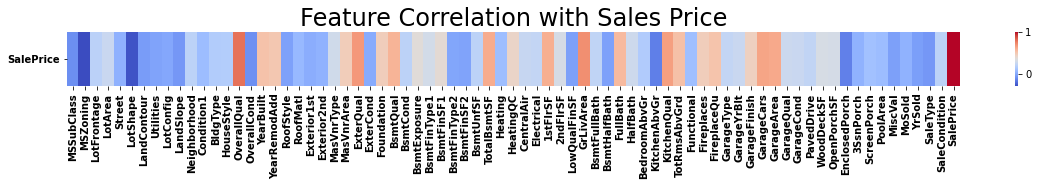

In [9]:
#Exploring the correlation between salesprice and the numerical features
#According to the heatmap, the lighter colors have a high positive correlation, 
#while the dark reds have a high negative correlation

num = train_c
numcorr = num.corr()
f,ax=plt.subplots(figsize=(20,1))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap="coolwarm")
plt.title("Feature Correlation with Sales Price", fontsize=24)
plt.xticks(weight='bold')
plt.yticks(weight='bold', rotation=0)


plt.show()

In [10]:
#This gives us a glimpse at the top ten most positively correlated features
#Overall quality and square footage play the largest roll in determining sales price

df_corr = numcorr['SalePrice'].sort_values(ascending=False).head(10).to_frame()
df_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
ExterQual,0.682639
KitchenQual,0.659600
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
BsmtQual,0.585207


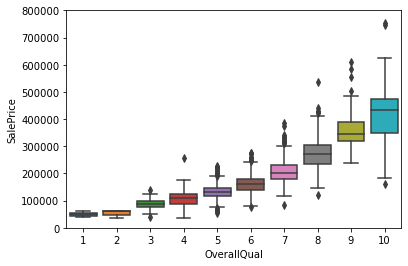

In [11]:
#Now we want to explore the correlated features to check if there is any necessary cleaning

# Overall Quality vs Sale Price
#We can see the people generally pay more for overall quality
#Because this makes sense, I'd leave it alone

data = pd.concat([train_c['SalePrice'], train_c['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

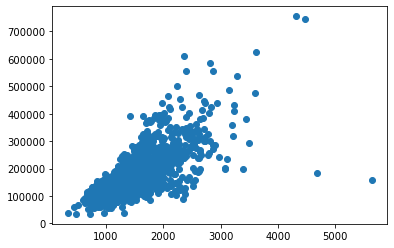

In [12]:
#Now lets take a look at the relationship between Sale Price and Square Footage
#The two observations over 4000 sqft, but less than $300k are outliers we will want to remove

plt.scatter(x=train_c['GrLivArea'], y=train_c["SalePrice"]);

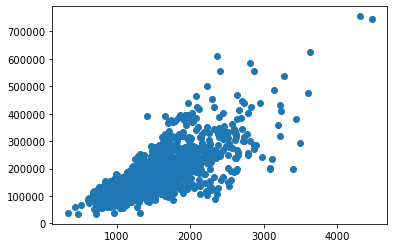

In [13]:
# Removing outliers manually (Two points in the bottom right)
train_c = train_c.drop(train_c[(train_c['GrLivArea']>4000) & (train_c['SalePrice']<300000)].index).reset_index(drop=True)
plt.scatter(x=train_c['GrLivArea'], y=train_c["SalePrice"]);

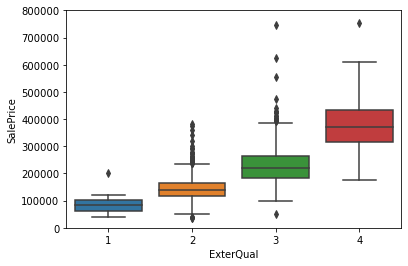

In [14]:
#ExterQual vs SalePrice
#looks good!

data1 = pd.concat([train_c['SalePrice'], train_c['ExterQual']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='ExterQual', y="SalePrice", data=data1)
fig.axis(ymin=0, ymax=800000);

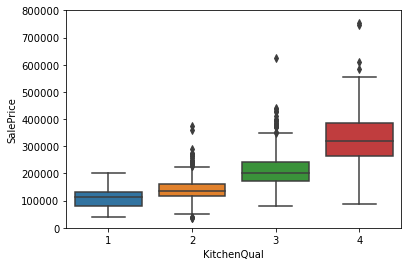

In [15]:
#KitchenQual vs SalePrice
#looks good here

data1 = pd.concat([train_c['SalePrice'], train_c['KitchenQual']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='KitchenQual', y="SalePrice", data=data1)
fig.axis(ymin=0, ymax=800000);


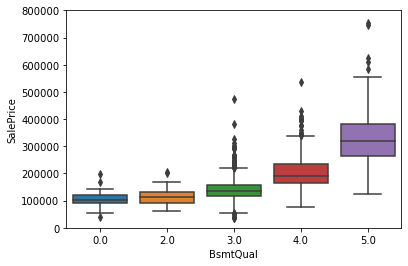

In [16]:
#BsmtQual vs SalePrice
#looks good here

data1 = pd.concat([train_c['SalePrice'], train_c['BsmtQual']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='BsmtQual', y="SalePrice", data=data1)
fig.axis(ymin=0, ymax=800000);

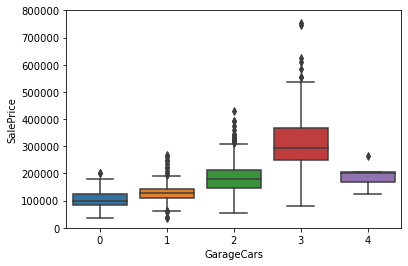

In [17]:
#GarageCars vs SalePrice

data1 = pd.concat([train_c['SalePrice'], train_c['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data1)
fig.axis(ymin=0, ymax=800000);

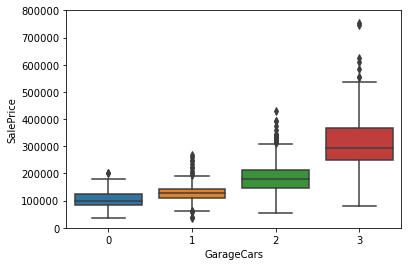

In [18]:
#It doesn't make sense that garages that can fit 4 cars would cost less
#Lets take those out of the data set
train_c = train_c.drop(train_c[train_c['GarageCars'] > 3].index).reset_index(drop=True)
data1 = pd.concat([train_c['SalePrice'], train_c['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data1)
fig.axis(ymin=0, ymax=800000);

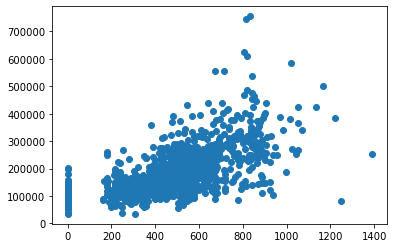

In [19]:
#GarageArea vs SalePrice

plt.scatter(x=train_c['GarageArea'], y=train_c["SalePrice"]);

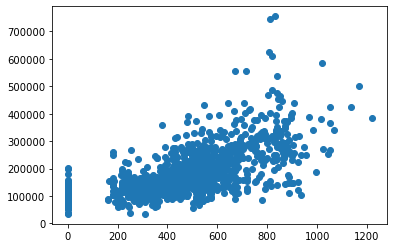

In [20]:
#Removing outliers manually (Two points in the bottom right)
#The observations with 0 square footage are probably houses that don't have a basement.
#This can be taken care of later when cleaning the data

train_c = train_c.drop(train_c[(train_c['GarageArea']>1200) & (train_c['SalePrice']<300000)].index).reset_index(drop=True)
plt.scatter(x=train_c['GarageArea'], y=train_c["SalePrice"]);

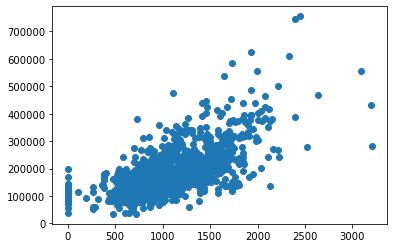

In [21]:
#Basement Square Footage vs Sale Price
#Looks good! No need to remove any outliers

plt.scatter(x=train_c['TotalBsmtSF'], y=train_c["SalePrice"]);

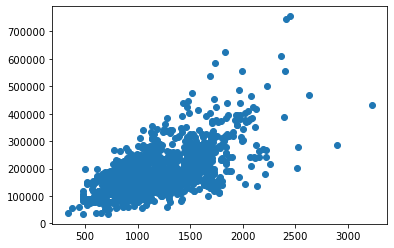

In [22]:
#First Floor Square Footage vs Sale Price
#Looks good! No need to remove any outliers

plt.scatter(x=train_c['1stFlrSF'], y=train_c["SalePrice"]);

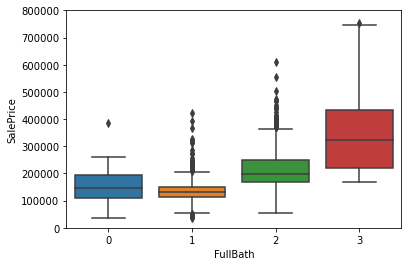

In [23]:
#Number of Full Baths vs Sale Price
#The houses with 0 full baths have slightly larger prices than house with 1, but that is probably due to other factors
#No need to remove outliers because the houses with 1-3 are appropriately spread

data2 = pd.concat([train_c['SalePrice'], train_c['FullBath']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='FullBath', y="SalePrice", data=data2)
fig.axis(ymin=0, ymax=800000);

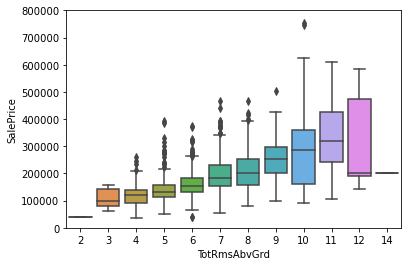

In [24]:
#Total rooms above ground vs sales price
data3 = pd.concat([train_c['SalePrice'], train_c['TotRmsAbvGrd']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=data3)
fig.axis(ymin=0, ymax=800000);

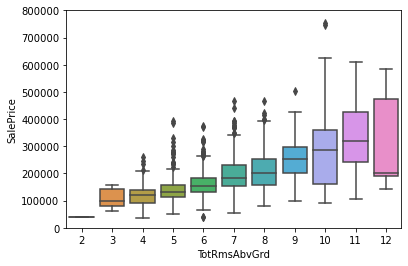

In [25]:
#Houses with 14 rooms above ground are priced lower. Let's remove that 

train_c = train_c.drop(train_c[train_c['TotRmsAbvGrd'] > 13].index).reset_index(drop=True)
data3 = pd.concat([train_c['SalePrice'], train_c['TotRmsAbvGrd']], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=data3)
fig.axis(ymin=0, ymax=800000);

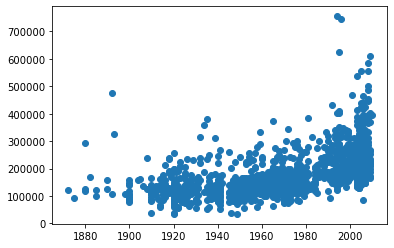

In [26]:
#YearBuilt vs SalePrice

plt.scatter(x=train_c['YearBuilt'], y=train_c["SalePrice"]);

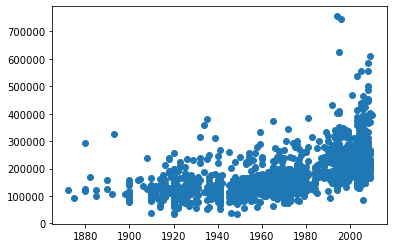

In [27]:
#Lets get rid of the house that was built in the 1800s but almost $500K

train_c = train_c.drop(train_c[(train_c['YearBuilt']<1900) & (train_c['SalePrice']>400000)].index).reset_index(drop=True)
plt.scatter(x=train_c['YearBuilt'], y=train_c["SalePrice"]);

In [28]:
#Final overview of what we've got goin' on now :) 
train_c.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,1,65.0,8450,1,2,2,0,0,2,...,0,0,0,0,0,2,2008,8,4,208500
1,20,1,80.0,9600,1,2,2,0,2,2,...,0,0,0,0,0,5,2007,8,4,181500
2,60,1,68.0,11250,1,1,2,0,0,2,...,0,0,0,0,0,9,2008,8,4,223500
3,70,1,60.0,9550,1,1,2,0,1,2,...,272,0,0,0,0,2,2006,8,0,140000
4,60,1,84.0,14260,1,1,2,0,2,2,...,0,0,0,0,0,12,2008,8,4,250000
5,50,1,85.0,14115,1,1,2,0,0,2,...,0,320,0,0,700,10,2009,8,4,143000
6,20,1,75.0,10084,1,2,2,0,0,2,...,0,0,0,0,0,8,2007,8,4,307000
7,60,1,0.0,10382,1,1,2,0,1,2,...,228,0,0,0,350,11,2009,8,4,200000
8,50,3,51.0,6120,1,2,2,0,0,2,...,205,0,0,0,0,4,2008,8,0,129900
9,190,1,50.0,7420,1,2,2,0,1,2,...,0,0,0,0,0,1,2008,8,4,118000


# Split Data For Training!

In [29]:
#Create dependent variable and independent variables
X = train_c.drop(['SalePrice'], axis = 1)
y = train_c['SalePrice']

#split data into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)


In [30]:
#Scale the data with Robust Scaler to get rid of any undetected outliers

scaler= RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Run a Simple Linear Regression Model

In [31]:
# Linear Regression Model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
round(linreg.score(X_train, y_train), 2)

0.9

In [32]:
#Use the model to predict
y_pred = linreg.predict(X_test)

# get evaluation metrics
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(linreg.score(X_test, y_test), 2)
mae = round(mean_absolute_error(y_test, y_pred), 2)

# evaluate performance
print("Model performance:\nMSE: {}\nRMSE: {}\nR2 score: {}\nMAE score: {}".format(mse, rmse, r2, mae))


Model performance:
MSE: 717032300.66
RMSE: 26777.46
R2 score: 0.86
MAE score: 19120.84


# Find Best Features with RFE

In [33]:
#Let's look for the optimal number of features for Linear Regression and use them for a new model test.
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfecv = RFECV(model)

pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
np.mean(n_scores)

pipeline.fit(X_train,y_train)

print('Optimal number of features : %d' % rfecv.n_features_)

rfecv.support_
rfecv_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_df.head(50)

Optimal number of features : 65


,Rank
MSSubClass,1
SaleType,1
HeatingQC,1
CentralAir,1
Electrical,1
1stFlrSF,1
2ndFlrSF,1
GrLivArea,1
BsmtFullBath,1
BsmtHalfBath,1


In [34]:
#Find list of best features

cols = list(X.columns)
temp = pd.Series(rfecv.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
    

In [35]:
#Make best features into new DataFrame

features_rfe2 = pd.DataFrame(train_c[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition']])

features_rfe2.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,60,1,65.0,8450,1,2,2,0,2,5,...,548,3.0,3.0,2,0,61,2,2008,8,4
1,20,1,80.0,9600,1,2,2,2,2,24,...,460,3.0,3.0,2,298,0,5,2007,8,4
2,60,1,68.0,11250,1,1,2,0,2,5,...,608,3.0,3.0,2,0,42,9,2008,8,4
3,70,1,60.0,9550,1,1,2,1,2,6,...,642,3.0,3.0,2,0,35,2,2006,8,0
4,60,1,84.0,14260,1,1,2,2,2,15,...,836,3.0,3.0,2,192,84,12,2008,8,4
5,50,1,85.0,14115,1,1,2,0,2,11,...,480,3.0,3.0,2,40,30,10,2009,8,4
6,20,1,75.0,10084,1,2,2,0,2,21,...,636,3.0,3.0,2,255,57,8,2007,8,4
7,60,1,0.0,10382,1,1,2,1,2,14,...,484,3.0,3.0,2,235,204,11,2009,8,4
8,50,3,51.0,6120,1,2,2,0,2,17,...,468,2.0,3.0,2,90,0,4,2008,8,0
9,190,1,50.0,7420,1,2,2,1,2,3,...,205,4.0,3.0,2,0,4,1,2008,8,4


In [36]:
#Add target column back into there!

features_rfe2['SalePrice'] = train_c['SalePrice']
features_rfe2.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,1,65.0,8450,1,2,2,0,2,5,...,3.0,3.0,2,0,61,2,2008,8,4,208500
1,20,1,80.0,9600,1,2,2,2,2,24,...,3.0,3.0,2,298,0,5,2007,8,4,181500
2,60,1,68.0,11250,1,1,2,0,2,5,...,3.0,3.0,2,0,42,9,2008,8,4,223500
3,70,1,60.0,9550,1,1,2,1,2,6,...,3.0,3.0,2,0,35,2,2006,8,0,140000
4,60,1,84.0,14260,1,1,2,2,2,15,...,3.0,3.0,2,192,84,12,2008,8,4,250000
5,50,1,85.0,14115,1,1,2,0,2,11,...,3.0,3.0,2,40,30,10,2009,8,4,143000
6,20,1,75.0,10084,1,2,2,0,2,21,...,3.0,3.0,2,255,57,8,2007,8,4,307000
7,60,1,0.0,10382,1,1,2,1,2,14,...,3.0,3.0,2,235,204,11,2009,8,4,200000
8,50,3,51.0,6120,1,2,2,0,2,17,...,2.0,3.0,2,90,0,4,2008,8,0,129900
9,190,1,50.0,7420,1,2,2,1,2,3,...,4.0,3.0,2,0,4,1,2008,8,4,118000


In [37]:
#Run the model again to compare

X = features_rfe2.drop(['SalePrice'], axis = 1)
y = features_rfe2['SalePrice']

#split data into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

#Scale the data with Robust Scaler to get rid of any undetected outliers

scaler= RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
round(linreg.score(X_train, y_train), 2)
y_pred = linreg.predict(X_test)

# get evaluation metrics
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(linreg.score(X_test, y_test), 2)
mae = round(mean_absolute_error(y_test, y_pred), 2)

# evaluate performance
print("Model performance:\nMSE: {}\nRMSE: {}\nR2 score: {}\nMAE score: {}".format(mse, rmse, r2, mae))


Model performance:
MSE: 688774649.53
RMSE: 26244.52
R2 score: 0.86
MAE score: 19118.1


# Run a Bunch of Regression Models (on RFE data) to See What's Up ???

In [38]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# get evaluation metrics
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(model.score(X_test, y_test), 4)
mae = round(mean_absolute_error(y_test, y_pred), 2)

# evaluate performance
print("LINEAR REGRESSION")
print("Model performance:\nMSE: {}\nRMSE: {}\nR2 score: {}\nMAE score: {}".format(mse, rmse, r2, mae))
print("\n")


#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# get evaluation metrics
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(model.score(X_test, y_test), 4)
mae = round(mean_absolute_error(y_test, y_pred), 2)

# evaluate performance
print("LOGISTIC REGRESSION")
print("Model performance:\nMSE: {}\nRMSE: {}\nR2 score: {}\nMAE score: {}".format(mse, rmse, r2, mae))
print("\n")


#LASSO Regression
from sklearn.linear_model import LassoCV
model = LassoCV()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

# get evaluation metrics
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(model.score(X_test, y_test), 4)
mae = round(mean_absolute_error(y_test, y_pred), 2)

# evaluate performance
print("LASSO REGRESSION")
print("Model performance:\nMSE: {}\nRMSE: {}\nR2 score: {}\nMAE score: {}".format(mse, rmse, r2, mae))
print("\n")



#Ridge Regression
from sklearn.linear_model import RidgeCV
model = RidgeCV()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

# get evaluation metrics
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(model.score(X_test, y_test), 4)
mae = round(mean_absolute_error(y_test, y_pred), 2)

# evaluate performance
print("RIDGE REGRESSION")
print("Model performance:\nMSE: {}\nRMSE: {}\nR2 score: {}\nMAE score: {}".format(mse, rmse, r2, mae))
print("\n")


#ElasticNet Regression
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

# get evaluation metrics
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(model.score(X_test, y_test), 4)
mae = round(mean_absolute_error(y_test, y_pred), 2)

# evaluate performance
print("ELASTICNET REGRESSION")
print("Model performance:\nMSE: {}\nRMSE: {}\nR2 score: {}\nMAE score: {}".format(mse, rmse, r2, mae))
print("\n")


#RandomForest Regression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

# get evaluation metrics
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(model.score(X_test, y_test), 4)
mae = round(mean_absolute_error(y_test, y_pred), 2)

# evaluate performance
print("RANDOMFOREST REGRESSION")
print("Model performance:\nMSE: {}\nRMSE: {}\nR2 score: {}\nMAE score: {}".format(mse, rmse, r2, mae))
print("\n")

#DecisionTree Regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

# get evaluation metrics
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(model.score(X_test, y_test), 4)
mae = round(mean_absolute_error(y_test, y_pred), 2)

# evaluate performance
print("DECISIONTREE REGRESSION")
print("Model performance:\nMSE: {}\nRMSE: {}\nR2 score: {}\nMAE score: {}".format(mse, rmse, r2, mae))
print("\n")


LINEAR REGRESSION
Model performance:
MSE: 688774649.53
RMSE: 26244.52
R2 score: 0.861
MAE score: 19118.1


LOGISTIC REGRESSION
Model performance:
MSE: 1645174647.56
RMSE: 40560.75
R2 score: 0.0138
MAE score: 27526.35


LASSO REGRESSION
Model performance:
MSE: 657332005.55
RMSE: 25638.49
R2 score: 0.8673
MAE score: 18391.38


RIDGE REGRESSION
Model performance:
MSE: 669000982.66
RMSE: 25865.05
R2 score: 0.865
MAE score: 18611.05


ELASTICNET REGRESSION
Model performance:
MSE: 4641021944.69
RMSE: 68125.05
R2 score: 0.0632
MAE score: 51700.55


RANDOMFOREST REGRESSION
Model performance:
MSE: 498690944.21
RMSE: 22331.39
R2 score: 0.8993
MAE score: 14845.94


DECISIONTREE REGRESSION
Model performance:
MSE: 1094773319.39
RMSE: 33087.36
R2 score: 0.779
MAE score: 23400.41




# Try TPOT Method! (On rfe2)

In [39]:
#Find best pipeline

import timeit
import xgboost
from tpot import TPOTClassifier
from tpot import TPOTRegressor

# instantiate tpot 
tpot = TPOTRegressor(verbosity=3,  
                      random_state=25, 
                      n_jobs=-1, 
                      generations=5, 
                      population_size=10,
                      early_stop = 5,
                      memory = None)
times = []
scores = []
winning_pipes = []

# run 3 iterations
for x in range(3):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('new_pipeline.py')

#Visualize Performance
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

30 operators have been imported by TPOT.


Version 0.11.6.post1 of tpot is outdated. Version 0.11.6.post2 was released 6 days ago.


_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'] ['f0', 'f1', 'f2', 

Version 0.11.6.post1 of tpot is outdated. Version 0.11.6.post2 was released 6 days ago.


_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'] ['f0', 'f1', 'f2', 

Version 0.11.6.post1 of tpot is outdated. Version 0.11.6.post2 was released 6 days ago.


_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'] ['f0', 'f1', 'f2', 

# Run Winning TPOT Pipeline from rfe2

In [39]:
#Run Winning TPOT Pipeline

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVR
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
X = features_rfe2.drop(['SalePrice'], axis = 1)
y = features_rfe2['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

#Scale the data with Robust Scaler to get rid of any undetected outliers

scaler= RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Average CV score on the training set was: -740103532.6231823
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.85, learning_rate=0.1, loss="huber", max_depth=8, max_features=0.8, min_samples_leaf=15, min_samples_split=16, n_estimators=100, subsample=0.7500000000000001)),
    LinearSVR(C=0.1, dual=False, epsilon=0.0001, loss="squared_epsilon_insensitive", tol=0.001)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 25)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)


# get evaluation metrics
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(exported_pipeline.score(X_test, y_test), 4)
mae = round(mean_absolute_error(y_test, y_pred), 2)
errors = abs(y_pred - y_test)


# evaluate performance
print("Model performance:\nMSE: {}\nRMSE: {}\nR2 score: {}\nMAE score: {}".format(mse, rmse, r2, mae))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 4), '%.')

Model performance:
MSE: 1094773319.39
RMSE: 33087.36
R2 score: 0.9055
MAE score: 23400.41
Accuracy: 85.3834 %.


# XGboost

In [40]:
#XGboost

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
X = features_rfe2.drop(['SalePrice'], axis = 1)
y = features_rfe2['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)


#Scale the data with Robust Scaler to get rid of any undetected outliers

scaler= RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

import xgboost as xg 
xgb_r = xg.XGBRegressor(n_estimators = 200, seed = 42,colsample_bytree=0.4,gamma=0,learning_rate=0.07, max_depth=3,min_child_weight=1.5)
xgb_r.fit(X_train,y_train)
y_pred6 = xgb_r.predict(X_test)


# get evaluation metrics
mse6 = round(mean_squared_error(y_test, y_pred6), 2)
rmse6 = round(mean_squared_error(y_test, y_pred6, squared=False), 2)
r2 = round(exported_pipeline.score(X_test, y_test), 4)
errors = abs(y_pred6 - y_test)
mae6 = round(np.mean(errors),2)

print("Model performance:\nMSE: {}\nRMSE: {}\nR2: {}\nMAE: {}".format(mse6, rmse6, r2, mae6))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 4), '%.')

Model performance:
MSE: 442778878.31
RMSE: 21042.31
R2: 0.9055
MAE: 14198.71
Accuracy: 91.1978 %.


# Hyperparameter Tuning XGBoost

In [41]:
random_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
             "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
             "min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
             "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400]}

In [42]:
#Random Search Training

# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgbr = XGBRegressor(n_estimators = 200, seed = 42,colsample_bytree=0.4,gamma=0,learning_rate=0.07, max_depth=3,min_child_weight=1.5)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgbr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   42.2s finished


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.4, gamma=0,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=0.07,
                                          max_delta_step=None, max_depth=3,
                                          min_child_weight=1.5, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=200, n_jobs=No...
                                          subsample=None, tree_method=None,
                                          validate_parameters=None,
                                          verb

In [43]:
xgb_random.best_params_

{'n_estimators': 300,
 'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [44]:
#Evaluate Random Search Findings

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy), "\n")
    
    return accuracy

base_model = XGBRegressor(n_estimators = 200, seed = 42,colsample_bytree=0.4,gamma=0,learning_rate=0.07, max_depth=3,min_child_weight=1.5)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = xgb_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 14198.7091 degrees.
Accuracy = 91.20%. 

Model Performance
Average Error: 14306.2366 degrees.
Accuracy = 91.10%. 

Improvement of -0.11%.


# Save XGBoost Model

In [45]:
win_model = XGBRegressor(n_estimators = 200, seed = 42,colsample_bytree=0.4,gamma=0,learning_rate=0.07, max_depth=3,min_child_weight=1.5)
win_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [46]:
import pickle
filename = 'win_model'
pickle.dump(win_model, open(filename, 'wb'))

# Begin Test Data Section

In [49]:
test = pd.read_csv('test.csv')

In [50]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


# Data Encoding

In [51]:
#make new variable to not mess up train df
test_c = test

#ordinal data encoding

MSZoning = {"A":0, "C (all)":0, "FV":0, "I":0, "RH":4, "RL":1, "RP":2, "RM":3}
test_c["MSZoning"] = test_c["MSZoning"].replace(MSZoning)

LotShape = {"Reg":2, "IR1":1, "IR2":1, "IR3":0}
test_c["LotShape"] = test_c["LotShape"].replace(LotShape)

LandContour = {"Lvl":2, "Bnk":1, "HLS":1, "Low":0}
test_c["LandContour"] = test_c["LandContour"].replace(LandContour)

LotConfig = {"Inside":0, "Corner":1, "CulDSac":0, "FR2":2, "FR3":2}
test_c["LotConfig"] = test_c["LotConfig"].replace(LotConfig)

LandSlope = {"Gtl":2, "Mod":1, "Sev":0}
test_c["LandSlope"] = test_c["LandSlope"].replace(LandSlope)

BldgType = {"1Fam":2, "2fmCon":0, "Duplex":0, "TwnhsE":1, "Twnhs":0}
test_c["BldgType"] = test_c["BldgType"].replace(BldgType)

HouseStyle = {"1Story":0, "1.5Fin":2, "1.5Unf":1, "2Story":5, "2.5Fin":4, "2.5Unf":3, "SFoyer":3, "SLvl":3}
test_c["HouseStyle"] = test_c["HouseStyle"].replace(HouseStyle)

RoofStyle = {"Flat":0, "Gable":2, "Gambrel":2, "Hip":2, "Mansard":2, "Shed":1}
test_c["RoofStyle"] = test_c["RoofStyle"].replace(RoofStyle)

RoofMatl = {"ClyTile":4, "CompShg":1, "Membran":0, "Metal":3, "Roll":0, "Tar&Grv":0, "WdShake":2, "WdShngl":2}
test_c["RoofMatl"] = test_c["RoofMatl"].replace(RoofMatl)

Exterior1st = {"AsbShng":0, "AsphShn":0, "BrkComm":2, "BrkFace":1, "CBlock":1, "CemntBd":1, "HdBoard":2, "ImStucc":1, "MetalSd":3, "Other":0, "Plywood":0, "PreCast":1, "Stone":2, "Stucco":2, "VinylSd":3, "Wd Sdng":3, "WdShing":3}
test_c["Exterior1st"] = test_c["Exterior1st"].replace(Exterior1st)

Exterior2nd = {"AsbShng":0, "AsphShn":0, "Brk Cmn":2, "BrkFace":1, "CBlock":1, "CmentBd":1, "HdBoard":2, "ImStucc":1, "MetalSd":3, "Other":0, "Plywood":0, "Stone":2, "Stucco":2, "VinylSd":3, "Wd Shng":3, "Wd Sdng":3}
test_c["Exterior2nd"] = test_c["Exterior2nd"].replace(Exterior2nd)

MasVnrType = {"BrkCmn":2, "BrkFace":2, "CBlock":1, "None":0, "Stone":1}
test_c["MasVnrType"] = test_c["MasVnrType"].replace(MasVnrType)

ExterQual = {"Ex":4, "Gd":3, "TA":2, "Fa":1, "Po":0}
test_c["ExterQual"] = test_c["ExterQual"].replace(ExterQual)

ExterCond = {"Ex":4, "Gd":3, "TA":2, "Fa":1, "Po":0}
test_c["ExterCond"] = test_c["ExterCond"].replace(ExterCond)

Foundation = {"BrkTil":0, "CBlock":1, "PConc":2, "Slab":1, "Stone":0, "Wood":0}
test_c["Foundation"] = test_c["Foundation"].replace(Foundation)

BsmtQual = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}
test_c["BsmtQual"] = test_c["BsmtQual"].replace(BsmtQual)

BsmtCond = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}
test_c["BsmtCond"] = test_c["BsmtCond"].replace(BsmtCond)

BsmtExposure = {"Gd":4, "Av":3, "Mn":2, "No":1, "NA":0}
test_c["BsmtExposure"] = test_c["BsmtExposure"].replace(BsmtExposure)

BsmtFinType1 = {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "NA":0}
test_c["BsmtFinType1"] = test_c["BsmtFinType1"].replace(BsmtFinType1)

BsmtFinType2 = {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "NA":0}
test_c["BsmtFinType2"] = test_c["BsmtFinType2"].replace(BsmtFinType2)

Heating = {"Floor":6, "GasA":5, "GasW":4, "Grav":3, "OthW":2, "Wall":1, "NA":0}
test_c["Heating"] = test_c["Heating"].replace(Heating)

HeatingQC = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}
test_c["HeatingQC"] = test_c["HeatingQC"].replace(HeatingQC)

Electrical = {"SBrkr":3, "FuseA":2, "FuseF":2, "FuseP":2, "Mix":1, "NA":0}
test_c["Electrical"] = test_c["Electrical"].replace(Electrical)

KitchenQual = {"Ex":4, "Gd":3, "TA":2, "Fa":1, "Po":0}
test_c["KitchenQual"] = test_c["KitchenQual"].replace(KitchenQual)

Functional = {"Typ":4, "Min1":3, "Min2":3, "Mod":2, "Maj1":1, "Maj2":1, "Sev":0, "Sal":0, "NA":0}
test_c["Functional"] = test_c["Functional"].replace(Functional)

FireplaceQu = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}
test_c["FireplaceQu"] = test_c["FireplaceQu"].replace(FireplaceQu)

GarageFinish = {"Fin":2, "RFn":1, "Unf":1, "NA":0}
test_c["GarageFinish"] = test_c["GarageFinish"].replace(GarageFinish)

GarageQual = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}
test_c["GarageQual"] = test_c["GarageQual"].replace(GarageQual)

GarageCond = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}
test_c["GarageCond"] = test_c["GarageCond"].replace(GarageCond)

PoolQC = {"Ex":4, "Gd":3, "TA":2, "Fa":1, "NA":0}
test_c["PoolQC"] = test_c["PoolQC"].replace(PoolQC)

Fence = {"GdPrv":2, "MnPrv":1, "GdWo":2, "MnWw":1, "NA":0}
test_c["Fence"] = test_c["Fence"].replace(Fence)

MiscFeature = {"Elev":3, "Gar2":2, "Othr":1, "Shed":1, "TenC":2, "NA":0}
test_c["MiscFeature"] = test_c["MiscFeature"].replace(MiscFeature)

Street = {"Grvl":0, "Pave":1}
test_c["Street"] = test_c["Street"].replace(Street)

Alley = {"Grvl":0, "Pave":1}
test_c["Alley"] = test_c["Alley"].replace(Alley)

CentralAir = {"N":0, "Y":1}
test_c["CentralAir"] = test_c["CentralAir"].replace(CentralAir)

GarageType = {"2Types":1, "Attchd":1, "Basment":1, "BuiltIn":1, "CarPort":1, "Detchd":1, "NA":0}
test_c["GarageType"] = test_c["GarageType"].replace(GarageType)

PavedDrive = {"Y":2, "P":1, "N":0}
test_c["PavedDrive"] = test_c["PavedDrive"].replace(PavedDrive)

Utilities = {"AllPub":1, "NA":0}
test_c["Utilities"] = test_c["Utilities"].replace(Utilities)

SaleType = {"COD":0, "Con":2, "ConLD":3, "ConLI":4, "ConLw":5, "CWD":1, "New":6, "Oth":7, "WD":8}
test_c["SaleType"] = test_c["SaleType"].replace(SaleType)



#nominal any order ?
lablcodr = LabelEncoder()

test_c["Neighborhood"] = lablcodr.fit_transform(test_c['Neighborhood'])
test_c["Condition1"] = lablcodr.fit_transform(test_c['Condition1'])
test_c["Condition2"] = lablcodr.fit_transform(test_c['Condition2'])
test_c["SaleCondition"] = lablcodr.fit_transform(test_c['SaleCondition'])

# Missing Value Replacement

In [52]:
#Lets get rid of the features with more than 80% of the data missing
#We want to do this because if we are imputing over 80% of the data with the same value, the feature will have low variance
#and will no longer be informative to the model

missing = test_c.isnull().sum().to_frame()
missing = missing[0].sort_values(ascending=False).head(10).to_frame()
missing[0] = missing[0].apply(lambda x : x/1460)
missing

,0
PoolQC,0.997260
MiscFeature,0.964384
Alley,0.926027
Fence,0.800685
FireplaceQu,0.500000
LotFrontage,0.155479
GarageCond,0.053425
GarageQual,0.053425
GarageYrBlt,0.053425
GarageFinish,0.053425


In [53]:
#We will want to get rid of the Pool, Misc Feature, Alley, and Fence feature since over 80% of the data is missing
test_c = test_c.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

In [54]:
#replace missing data
test_c['LotFrontage'].fillna(0, inplace = True)
test_c['GarageYrBlt'].fillna(0, inplace = True)
test_c['MasVnrArea'].fillna(0, inplace = True)
test_c['Utilities'].fillna(0, inplace = True)
test_c['MSZoning'].fillna(0, inplace = True)
test_c['MasVnrType'].fillna(0, inplace = True)
test_c['BsmtExposure'].fillna(0, inplace = True)
test_c['BsmtQual'].fillna(0, inplace = True)
test_c['BsmtCond'].fillna(0, inplace = True)
test_c['BsmtExposure'].fillna(0, inplace = True)
test_c['BsmtFinType1'].fillna(0, inplace = True)
test_c['BsmtFinType2'].fillna(0, inplace = True)
test_c['Electrical'].fillna(0, inplace = True)
test_c['FireplaceQu'].fillna(0, inplace = True)
test_c['GarageType'].fillna(0, inplace = True)
test_c['GarageFinish'].fillna(0, inplace = True)
test_c['GarageQual'].fillna(0, inplace = True)
test_c['GarageCond'].fillna(0, inplace = True)
test_c['Exterior1st'].fillna(0, inplace = True)
test_c['Exterior2nd'].fillna(0, inplace = True)
test_c['Functional'].fillna(0, inplace = True)
test_c['SaleType'].fillna(0, inplace = True)
test_c['SaleType'].fillna(0, inplace = True)
test_c['KitchenQual'].fillna(0, inplace = True)
test_c['BsmtFinSF1'].fillna(0, inplace = True)
test_c['BsmtFinSF2'].fillna(0, inplace = True)
test_c['BsmtUnfSF'].fillna(0, inplace = True)
test_c['TotalBsmtSF'].fillna(0, inplace = True)
test_c['BsmtFullBath'].fillna(0, inplace = True)
test_c['BsmtHalfBath'].fillna(0, inplace = True)
test_c['GarageCars'].fillna(0, inplace = True)
test_c['GarageArea'].fillna(0, inplace = True)

In [55]:
test_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   float64
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   float64
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int32  
 12  Condition1     1459 non-null   int32  
 13  Condition2     1459 non-null   int32  
 14  BldgType       1459 non-null   int64  
 15  HouseStyle     1459 non-null   int64  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [56]:
#See if there are any other missing values. If so, see where using code below
#test_c.columns[test_c.isnull().any()]

test_c.isnull().values.any()

False

# Implement Best Features Into Testing Data

In [57]:
#Based on RFE we ran in the training data

features_test = pd.DataFrame(test_c[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition']])

features_test.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,20,4.0,80.0,11622,1,2,2,0,2,12,...,730.0,3.0,3.0,2,140,0,6,2010,8.0,4
1,20,1.0,81.0,14267,1,1,2,1,2,12,...,312.0,3.0,3.0,2,393,36,6,2010,8.0,4
2,60,1.0,74.0,13830,1,1,2,0,2,8,...,482.0,3.0,3.0,2,212,34,3,2010,8.0,4
3,60,1.0,78.0,9978,1,1,2,0,2,8,...,470.0,3.0,3.0,2,360,36,6,2010,8.0,4
4,120,1.0,43.0,5005,1,1,1,0,2,22,...,506.0,3.0,3.0,2,0,82,1,2010,8.0,4
5,60,1.0,75.0,10000,1,1,2,1,2,8,...,440.0,3.0,3.0,2,157,84,4,2010,8.0,4
6,20,1.0,0.0,7980,1,1,2,0,2,8,...,420.0,3.0,3.0,2,483,21,3,2010,8.0,4
7,60,1.0,63.0,8402,1,1,2,0,2,8,...,393.0,3.0,3.0,2,0,75,5,2010,8.0,4
8,20,1.0,85.0,10176,1,2,2,0,2,8,...,506.0,3.0,3.0,2,192,0,2,2010,8.0,4
9,20,1.0,70.0,8400,1,2,2,1,2,12,...,525.0,3.0,3.0,2,240,0,4,2010,8.0,4


# Predict With Winning Model

In [58]:
#Order the variables correctly (how it was in training model 
#or else you'll get an error)

features2 = features_test[['MSSubClass','HeatingQC','MSZoning','LandContour','MasVnrType','BsmtFinType1','BedroomAbvGr',
 'FireplaceQu','GarageYrBlt','WoodDeckSF','Foundation','MasVnrArea','GarageQual','GarageCars',
'SaleCondition', 'Exterior1st','GarageArea','YearRemodAdd','LotConfig','BsmtCond',
 'BsmtExposure','1stFlrSF','FullBath','ExterCond','LotShape','Heating','BsmtFullBath',
 'YearBuilt','Neighborhood','BldgType','BsmtFinSF1','YrSold','GarageFinish','BsmtUnfSF',
 'OpenPorchSF','ExterQual','BsmtQual','TotalBsmtSF','OverallCond','BsmtFinType2','CentralAir',
 'SaleType','RoofMatl','OverallQual','2ndFlrSF','GrLivArea','RoofStyle',
 'HouseStyle','KitchenQual','LotFrontage','Functional','Exterior2nd','HalfBath', 'LandSlope',
 'MoSold','TotRmsAbvGrd','GarageType','LotArea','Fireplaces','Street','GarageCond',
 'PavedDrive','BsmtHalfBath','KitchenAbvGr','Electrical']].values

In [59]:
#load model
import pickle
loaded_model = pickle.load(open('win_model', 'rb'))

In [60]:
pred = loaded_model.predict(features2)
pred

array([603408.1 , 545289.6 , 579750.94, ..., 507315.88, 375131.  ,
       592740.8 ], dtype=float32)

In [61]:
#Put into Dataframe for better visualization

predictions = pd.DataFrame(data = pred)
predictions['Id'] = test_c['Id']
predictions.rename(columns = {0:"SalePrice"}, inplace = True)
predictions = predictions.astype(int)
predictions[['Id', 'SalePrice']]
predictions.head(10)

,SalePrice,Id
0,603408,1461
1,545289,1462
2,579750,1463
3,592426,1464
4,468562,1465
5,579786,1466
6,565453,1467
7,579691,1468
8,534739,1469
9,633016,1470


In [62]:
#Export to CSV
predictions.to_csv('final_proj_predictions.csv')

# Look at MAPE 

In [63]:
p = pd.read_csv('final_proj_predictions.csv')
o = pd.read_csv('test_actual_price.csv')
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(mape)

2.4860359720714023


# Additional Wonderings....

We played around wiht tons of different variations of the data as well as different machien learnign models. Here we have some we created that don't look QUITE right, but we'd love some further insight on...

# Voting Regressor

In [47]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [64]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
# Insatiate individual models

knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
lr = LinearRegression()
rf = RandomForestRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
ridge = Ridge()
svr = SVR(kernel='linear')
gbr = GradientBoostingRegressor()

In [66]:
# Voting Regressor 

X = features_rfe2.drop(['SalePrice'], axis = 1)
y = features_rfe2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

vr = VotingRegressor(
    estimators=[('rf', rf),  ('dt', dt),('lgbm', lgbm),('ridge',ridge), 
               ('svr', svr),('xgb', xgb)])

vr.fit(X_train, y_train)

y_pred = vr.predict(X_test)


mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(vr.score(X_test, y_test), 4)
mae = round(mean_absolute_error(y_test, y_pred), 2)

print("RSME:", rmse)
print("r2:", r2)
print("mae:", mae)
print("\n")

RSME: 20685.53
r2: 0.9136
mae: 14037.07




# Save Voting Regressor Model

In [53]:
vr_model = VotingRegressor(
    estimators=[('rf', rf),  ('dt', dt),('lgbm', lgbm),('ridge',ridge), 
               ('svr', svr),('xgb', xgb)])

vr_model.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('dt', DecisionTreeRegressor()),
                            ('lgbm', LGBMRegressor()), ('ridge', Ridge()),
                            ('svr', SVR(kernel='linear')),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constr

In [54]:
import pickle
filename = 'votreg_model'
pickle.dump(vr_model, open(filename, 'wb'))


#got an MAPE of ~0.09

# Log-ing our Data to Reduce Skewedness

When do we do this vs. when not to. We got really, really low MAE and really high R2 scores, which didn't seem quite right.

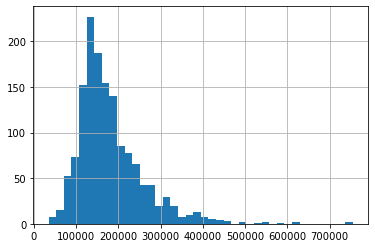

In [67]:
train_c['SalePrice'].hist(bins = 40);

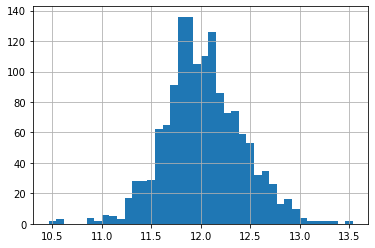

In [68]:
train_c['LogPrice'] = np.log(train_c['SalePrice'])
train_c['LogPrice'].hist(bins = 40);